# Фрактали: інтерактивний гайд. Побудова зображень природних об’єктів за допомогою фракталів
#### Програмне вирішення певного класу задач, візуалізація теоретичних фактів математичного аналізу. 

<details>
<summary>Зміст<span class="tocSkip"></span></summary>
<div class="toc"><ul class="toc-item"><li><span><a href="#Що-таке-фрактали?"><span class="toc-item-num"></span>Що таке фрактали?</a></span></li><li><span><a href="#Найвідоміші-фрактали"><span class="toc-item-num"></span>Найвідоміші фрактали</a></span><ul class="toc-item"><li><span><a href="#Множина-Кантора"><span class="toc-item-num"></span>Множина Кантора</a></span></li><li><span><a href="#Трикутник-Серпінського"><span class="toc-item-num"></span>Трикутник Серпінського</a></span></li><li><span><a href="#Множина-Мандельброта"><span class="toc-item-num"></span>Множина Мандельброта</a></span></li><li><span><a href="#Множина-Жуліа"><span class="toc-item-num"></span>Множина Жуліа</a></span></li></ul></li><li><span><a href="#Фрактали-в-природі"><span class="toc-item-num"></span>Фрактали в природі</a></span><ul class="toc-item"><li><span><a href="#Сніжинки"><span class="toc-item-num"></span>Сніжинки</a></span></li><li><span><a href="#Дерева"><span class="toc-item-num"></span>Дерева</a></span></li><li><span><a href="#Папоротень-Барнслі"><span class="toc-item-num"></span>Папоротень Барнслі</a></span></li><li><span><a href="#Алгоритм-&quot;Diamond-Square&quot;"><span class="toc-item-num"></span>Алгоритм "Diamond-Square"</a></span></li></ul></li><li><span><a href="#Джерела"><span class="toc-item-num"></span>Джерела</a></span><ul class="toc-item"><li><span><a href="#Книги"><span class="toc-item-num"></span>Книги</a></span></li><li><span><a href="#Статті"><span class="toc-item-num"></span>Статті</a></span></li><li><span><a href="#Відео-та-плейлісти"><span class="toc-item-num"></span>Відео та плейлісти</a></span></li></ul></li></ul></div>
</details>


## Що таке фрактали?
Фрактал — це математичний об'єкт, який характеризується повторюваністю своїх елементів на різних масштабах і відрізняється від звичайних геометричних форм за рахунок своєї фрактальної розмірності, фрактал постає однаковим при будь-якому збільшенні.

Фрактали стали не лише предметом математичнмх досліджень, але й знайшли застосування в різних наукових галузях. Наприклад, вони використовуються у фізиці, біології та у комп'ютерній графіці для візуалізації складних структур, таких як ландшафти. Особливо цікавим є їх вплив на моделювання природних явищ, де фрактальні структури часто спостерігаються, як-от у формах сніжинок.

У минулому математика мала тенденцію ігнорувати об'єкти, які не вкладалися у рамки класичного числення. Такі об'єкти вважалися "патологічними" і не заслуговували на детальне вивчення. Проте, з часом з'ясувалося, що негладкі, нерегулярні множини можуть бути джерелом цінних знань, особливо у розумінні природних феноменів. Фрактальна геометрія відкрила нові шляхи для аналізу таких структур.

Мандельброт спочатку визначив фрактал як множину з розмірністю Хаусдорфа-Безиковича, яка перевищує топологічну розмірність. Однак пізніше він переглянув це визначення, роблячи акцент на самоподібності фракталів. Таке оновлене визначення краще описує багатство фрактальних структур, які можна зустріти в природі та наукових дослідженнях, включаючи багато фракталів, що зустрічаються у фізиці.

---

## Найвідоміші фрактали

### Множина Кантора
Множина Кантора є прототипом фракталу - вона самоподібна.
Створення множини Кантора можна представити як такий процес: розглянемо відрізок $[0,1]$. На першому кроці видаляємо відкритий відрізок $(\frac{1}{3},\frac{2}{3})$, отримуючи два замкнених відрізки: $[0,\frac{1}{3}]$ та $[\frac{2}{3},1]$. На кожному наступному кроці розділяємо кожний існуючий відрізок на три рівні частини і видаляємо середню. Процес продовжується нескінченно.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntSlider, FloatSlider, Dropdown

In [76]:
def draw_cantor_set(start, length, depth, y, ax):
    if depth == 0:
        ax.plot([start, start + length], [y, y], color='#000000', lw=2.5)
    else:
        draw_cantor_set(start, length / 3, depth-1, y, ax)
        draw_cantor_set(start + length * 2 / 3, length / 3, depth-1, y, ax)

def cantor_set(iterations):
    fig, ax = plt.subplots(figsize=(50, 25))
    for i in range(iterations+1):
        draw_cantor_set(0, 1, i, 1 - i * 0.1, ax)
    ax.invert_yaxis()
    ax.set_aspect(aspect='auto')
    ax.axis('off')
    plt.show()

interactive(cantor_set, iterations=IntSlider(min=0, max=6, step=1, value=4, description="Ітерації"))

interactive(children=(IntSlider(value=4, description='Ітерації', max=6), Output()), _dom_classes=('widget-inte…

### Трикутник Серпінського
Нехай $T_{0}$ буде рівностороннім трикутником. Для кожного трикутника, який ми отримаємо після $n$ ітерацій, позначимо його як $T_{n}$. Тоді трикутник Серпінського на $n$-й ітерації можна описати так: 
$$T_{n+1}=F(T_{n})$$
де $F$ – це функція, яка бере трикутник $T_{n}$, розділяє його на чотири менших трикутники і видаляє центральний. 

Формально, якщо $T_{n}$ має вершини $A_{n}$, $B_{n}$, $C_{n}$, то $[0,\frac{1}{3}]$ буде складатися з трьох трикутників з вершинами $A_{n}$, $M_{A_{n}B_{n}}$, $M_{A_{n}C_{n}}$, $B_{n}$, $M_{A_{n}B_{n}}$, $M_{C_{n}B_{n}}$ та $C_{n}$, $M_{C_{n}B_{n}}$, $M_{A_{n}C_{n}}$, де $M_{XY}$ – це середина відрізка $XY$.
Після нескінченного числа ітерацій ми отримаємо фрактал Серпінського, який можна описати як множину всіх точок, що належать хоча б одному з трикутників $T_{n}$ для всіх $n$.

In [77]:
def draw_sierpinski(depth, ax, vertices):
    if depth == 0:
        ax.fill(*zip(*vertices), '#000000')
    else:
        p1 = vertices[0]
        p2 = vertices[1]
        p3 = vertices[2]
        mid12 = (p1 + p2) / 2
        mid23 = (p2 + p3) / 2
        mid31 = (p3 + p1) / 2
        
        draw_sierpinski(depth - 1, ax, [p1, mid12, mid31])
        draw_sierpinski(depth - 1, ax, [mid12, p2, mid23])
        draw_sierpinski(depth - 1, ax, [mid31, mid23, p3])

def sierpinski(depth): 
    fig, ax = plt.subplots(figsize=(10, 8.75))
    vertices = np.array([[0.5, np.sqrt(3)/2], [0, 0], [1, 0]])
    draw_sierpinski(depth, ax, vertices)
    ax.set_axis_off()
    plt.show()
    
interactive(sierpinski, depth=IntSlider(min=0, max=7, step=1, value=5, description="Ітерації"))

interactive(children=(IntSlider(value=5, description='Ітерації', max=7), Output()), _dom_classes=('widget-inte…

### Множина Мандельброта
Множина Мандельброта визначається множиною комплексних чисел $c$, для яких послідовність $z_n$ (де $z_{0}=0$ та $z_{n+1}=z_{n}^2+c$) може або залишатися обмеженою або прямувати до нескінченності зі збільшенням $n$. Якщо послідовність залишається обмеженою (не дійшовши до нескінченності) для конкретного $c$ після великої кількості ітерацій, ми вважаємо, що $c$ належить множині Мандельброта. В іншому випадку, якщо вона дійшла до нескінченності в певний момент ітерації, $c$ не вважається частиною множини Мандельброта.
Ітераційна функція: $$z_{n+1}=z_{n}^2+c$$ Тут $z$ – це комплексне число, що на початку ітерацій $z_{0}=0$.

In [78]:
def mandelbrot(h, w, x_min, x_max, y_min, y_max, max_iter, z_pow):
    x = np.linspace(x_min, x_max, num=w).reshape((1, w))
    y = np.linspace(y_min, y_max, num=h).reshape((h, 1))
    C = np.tile(x, (h, 1)) + 1j * np.tile(y, (1, w))
    
    Z = np.zeros(C.shape, dtype=complex)
    M = np.zeros(C.shape, dtype=int)
    for i in range(max_iter):
        mask = np.abs(Z) < 2
        M[mask] = i
        Z[mask] = Z[mask] ** z_pow + C[mask]
    return M

def mandelbrot_zoom(re_center, im_center, zoom, max_iter, cm, z_pow):   
    size = 400
    scale_factor = 1.5 / zoom
    x_min = re_center - scale_factor
    x_max = re_center + scale_factor
    y_min = im_center - scale_factor
    y_max = im_center + scale_factor
    
    M = mandelbrot(size, size, x_min, x_max, y_min, y_max, max_iter, z_pow)
    
    fig, ax = plt.subplots(figsize=(10, 10))   
    plt.imshow(M, extent=(x_min, x_max, y_min, y_max), cmap=cm)
    colorbar = plt.colorbar()
    plt.rcParams.update({'axes.titlesize': 17, 'axes.labelsize': 17})
    plt.show()

cmaps_dropdown = Dropdown(options=['turbo', 'magma', 'viridis', 'cividis'], value='magma', description='Палітра')

interactive(
    mandelbrot_zoom,
    re_center=FloatSlider(min=-2.5, max=1.5, step=0.05, value=-0.75, description="Re"),
        im_center=FloatSlider(min=-2, max=2, step=0.05, value=0, description="Im"),
    zoom=FloatSlider(min=1, max=100, step=1, value=1, readout_format='.1f'),
    max_iter=IntSlider(min=50, max=1000, step=10, value=50),
    cm=cmaps_dropdown,
    z_pow=FloatSlider(min=1.0, max=10.0, step=0.05, value=2)
)

interactive(children=(FloatSlider(value=-0.75, description='Re', max=1.5, min=-2.5, step=0.05), FloatSlider(va…

#### Ремарка для користувача
Слайдери `Re` і `Im` визначають координати центру візуалізації множини Мандельброта, `zoom` регулює рівень збільшення чи зменшення фракталу, а `max_iter` контролює максимальну кількість ітерацій, яка впливає на деталізацію та якість зображення фракталу.

Шкала відображає кількість ітерацій, які потрібно для того, щоб точка вийшла за межі визначеного радіусу (в даному випадку радіус $2$).
Якщо в процесі ітерації модуль $z$ стає більшим за $2$, то точка вважається "біжучою" і не належить множині Мандельброта. Для вивчення динаміки системи на практиці використовують максимальне число ітерацій(`max_iter`). Якщо після встановленого числа ітерацій $z$ не стає більшим за $2$, точка вважається належною до множини Мандельброта.
Різні кольори допомагають легко ідентифікувати області, де точки вийшли за радіус після різної кількості ітерацій. Таким чином, ця шкала відображає "швидкість" збіжності або розбіжності точок у фракталі Мандельброта.

Під час дослідження множини Мандельброта мене зацікавив вигляд фракталу з формулою $z_{n+1}=z_{n}^p+c$, де p буде відмінним від двійки, тому змінюючи значення на слайдері `z_pow` ви маєте можливість дослідити зміну форми множини Мандельброта за зміни степіню z.

**<em>Палітри viridis та cividis будуть кращім вибором для перегляду зображення для дальтоніків</em>**

### Множина Жуліа
Множина Жуліа – це множина комплексних чисел, яка визначається системою ітерацій: $z_{n+1}=z_{n}^2+c$, де z – комплексне число, а $c$ – деяка комплексна константа.

In [79]:
def julia_set(h, w, x_min, x_max, y_min, y_max, c, max_iter):
    x = np.linspace(x_min, x_max, num=w).reshape((1, w))
    y = np.linspace(y_min, y_max, num=h).reshape((h, 1))
    Z = np.tile(x, (h, 1)) + 1j * np.tile(y, (1, w))

    M = np.zeros(Z.shape, dtype=int)
    for i in range(max_iter):
        mask = np.abs(Z) < 2
        M[mask] = i
        Z[mask] = Z[mask] ** 2 + c
    return M

def julia_zoom(re_center, im_center, zoom, c_real, c_imag, max_iter, cm):   
    size = 400
    scale_factor = 1.5 / zoom
    x_min = re_center - scale_factor
    x_max = re_center + scale_factor
    y_min = im_center - scale_factor
    y_max = im_center + scale_factor
    
    J = julia_set(size, size, x_min, x_max, y_min, y_max, complex(c_real, c_imag), max_iter)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.imshow(J, extent=(x_min, x_max, y_min, y_max), cmap=cm)
    colorbar = plt.colorbar()
    plt.rcParams.update({'axes.titlesize': 17, 'axes.labelsize': 17})
    plt.show()

cmaps_dropdown = Dropdown(options=['turbo', 'magma', 'viridis', 'cividis'], value='magma', description='Палітра')

interactive(
        julia_zoom,
        re_center=FloatSlider(min=-2, max=2, step=0.05, value=0, description="Re"),
        im_center=FloatSlider(min=-2, max=2, step=0.05, value=0, description="Im"),
        zoom=FloatSlider(min=1, max=100, step=1, value=1, readout_format='.1f'),
        c_real=FloatSlider(min=-2, max=2, step=0.01, value=-0.86),
        c_imag=FloatSlider(min=-2, max=2, step=0.01, value=0.12),
        max_iter=IntSlider(min=50, max=1000, step=10, value=50), cm = cmaps_dropdown
    )

interactive(children=(FloatSlider(value=0.0, description='Re', max=2.0, min=-2.0, step=0.05), FloatSlider(valu…

Відмінність між множиною Мандельброта і множиною Жуліа полягає в початковій точці ітераційного процесу та константі $c$. Для множини Мандельброта початкова точка завжди дорівнює $0$, а $c$ змінюється. Для множини Жуліа $c$ є постійною, а початкова точка $z$ змінюється.
#### Ремарка для користувача
Для відуалізації множини Жуліа повзунки `Re` і `Im` так само визначають положення центру візуалізації множини Жуліа, `zoom` регулює рівень збільшення, a `c_real` із `c_imag` змінюють дійсну та уявну частини комплексного параметру $c$, який визначає форму множини Жуліа, і `max_iter` контролює глибину ітерацій, впливаючи на деталізацію зображення.

Як і в попередній візуалізації кольорова шкала показує, як швидко значення в певній точці виходять за межі радіуса $2$ під час ітераційного процесу. Колір кожної точки відповідає кількості ітерацій, необхідних для того, щоб визначити, чи належить точка до множини чи ні.

---

## Фрактали в природі
Як було зазначено раніше - фрактали відомі як геометричні фігури, які демонструють подібність у всьому діапазоні масштабу, тобто вони виглядають однаково незалежно від того, наскільки вони великі чи маленькі. І вони, насправді, всюдисущі в природі. У своїй роботі я розглядаю декілька прикладів таких фракталів.

Є багато прикладів фракталів, з якими ми стикаємося в повсякденному житті. Ананаси ростуть за фрактальними законами, а кристали льоду утворюють подібні фрактальні форми. Фрактали дозволяють рослинам максимізувати вплив сонячного світла. Вони дозволяють серцево-судинній системі ефективно транспортувати кисень до всіх частин тіла.

### Сніжинки
Немає й двох абсолютно однакових по формі сніжинок, але багато з них представляють фрактали, оскільки гілки сніжинки породжують власні бічні гілки.

Найвідоміший фрактальний візерунок сніжинки відомий як **сніжинка Коха**, що походить від одного рівностороннього трикутника, який утворює інший, інший і інший. Сніжинка Коха стала одним з найперших та найвідоміших фракталів, вперше описаним шведським математиком Хельге фон Кохом.

Сніжинка Коха може бути описана функцією, яка бере ребро фігури та замінює його серединну третину на два інших відрізки, які формують еквівалентні сторони рівностороннього трикутника з вилученою основою.

In [80]:
def koch_snowflake(order):
    def koch_curve(points, order):
        if order == 0:
            return points

        new_points = []
        for i in range(len(points) - 1):
            p1, p2 = points[i], points[i + 1]
            u = (p2 - p1) / 3
            p3 = p1 + u
            p4 = p3 - u * np.exp(np.pi * 1j / 1.5) 
            p5 = p1 + 2 * u
            new_points.extend([p1, p3, p4, p5])
        new_points.append(points[-1])
        return koch_curve(new_points, order - 1)

    triangle = np.exp(np.pi * 1j * np.arange(3) / 1.5)
    snowflake = koch_curve(triangle.tolist() + [triangle[0]], order)
    return np.real(snowflake), np.imag(snowflake)

def plot_koch_snowflake(order): 
    x, y = koch_snowflake(order)
    fig, ax = plt.subplots(figsize=(10, 7.5))
    ax.plot(x, y, linewidth=0.7, color='#000000')
    ax.set_axis_off()
    ax.set_aspect('equal')
    plt.show()

interactive(plot_koch_snowflake, order=IntSlider(min=0, max=6, step=1, value=4, description="Ітерації"))

interactive(children=(IntSlider(value=4, description='Ітерації', max=6), Output()), _dom_classes=('widget-inte…

### Дерева
Навіть у природі процес росту дерева відбувається рекурсивно. Форма гілок і гілочок дерева може нагадувати форму всього дерева у зменшеному масштабі. Гілки можуть поділятися на менші гілки, які, в свою чергу, можуть розгалужуватися. Це створює самоподібні структури, характерні для фракталам.

Модель фрактального дерева, показана нище, використовується для імітації природних форм дерев та кущів, демонструючи, як із простих правил можуть виникати складні структури.

Візуалізація розпочинається із заданої початкової точки та довжини стовбура: Від точки початку малюється початкова лінія (стебло дерева) з певною довжиною та товщиною, які зменшуються з кожною ітерацією (у моєму випадку в 0.75 та 0.8 разів). На кінці стебла (новій точці початку) сворюються дві нові гілки, нахилені під заданим кутом. Такий процес продовжується до тих пір, поки не буде досягнуто задану глибину ітерацій.

In [6]:
def draw_fractal_tree(ax, origin, angle, length, depth, max_depth, initial_thickness, branch_angle, symmetry):
    branch_thickness = initial_thickness * (0.8 ** (max_depth - depth))
    
    if depth == 0:
        ax.plot([origin[0], origin[0] + length * np.cos(angle)], 
                [origin[1], origin[1] + length * np.sin(angle)], 
                color='#72ad13', lw=branch_thickness)
        return

    end_point = origin + length * np.array([np.cos(angle), np.sin(angle)])
    ax.plot(
        [origin[0], end_point[0]], [origin[1], end_point[1]], 
        color='#198703' if depth == 1 else '#573705', lw=branch_thickness)

    new_length = length * 0.75
    new_depth = depth - 1

    draw_fractal_tree(
        ax, end_point, angle + branch_angle/symmetry, new_length, new_depth, max_depth, 
        initial_thickness, branch_angle, symmetry)
    draw_fractal_tree(
        ax, end_point, angle - branch_angle, new_length, new_depth, max_depth, 
        initial_thickness, branch_angle, symmetry)

def plot_fractal_tree(iterations, branch_angle, symmetry):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_aspect('equal')
    ax.axis('off') 

    origin = np.array([0.5, 0.1])
    angle = np.pi / 2
    length = 0.2
    depth = iterations 
    initial_thickness = 4

    draw_fractal_tree(ax, origin, angle, length, depth, depth, initial_thickness, branch_angle, symmetry)

    plt.show()

interactive(plot_fractal_tree,
            iterations=IntSlider(min=1, max=13, step=1, value=11, description='Ітерації'),
            branch_angle=FloatSlider(min=0.3, max=np.pi/2.3, step=0.05, value=0.55, description='Нахил', readout=False),
            symmetry=FloatSlider(min=0.3, max=3, step=0.05, value=1.5, description='Симетрія', readout=False))

interactive(children=(IntSlider(value=11, description='Ітерації', max=13, min=1), FloatSlider(value=0.55, desc…

`Нахил` контролює нахил гілок дерева, а `Симетрія` впливає на симетрію й відповідно нахил самого дерева.

### Папоротень Барнслі
Фрактал папороті Барнслі є математичною моделлю, що імітує природну форму папороті. Ця модель використовує ітеративний процес для створення складної структури, яка дивовижно нагадує зелені листки папороті.

Нехай $F$ - функція, що трансформує точку $(x,y)$ в нову на основі обраної випадковим чином підфункції $f_1,f_2,f_3,$ або $f_4$. Кожна з цих функцій відповідає за певну трансформацію частини фрактала:
- $f_1(P)=\begin{bmatrix}
0 & 0 \\
0 & 0.16
\end{bmatrix}P + \begin{bmatrix}
0 \\
0
\end{bmatrix}$   відповідає за стебло (бере будь-яку точку та переносить її в лінію в центрі)
- $f_2(P) = \begin{bmatrix}
0.85 & t \\
-0.04 & 0.85
\end{bmatrix}P + \begin{bmatrix}
0 \\
1.6
\end{bmatrix}$   рухає точки вверх, та залежачи від параметру $t$ в сторону
- $f_3(P) = \begin{bmatrix}
0.2 & -0.26 \\
0.23 & 0.22
\end{bmatrix}P + \begin{bmatrix}
0 \\
1.6
\end{bmatrix}
$   та  $f_4(P) = \begin{bmatrix}
-0.15 & 0.28 \\
0.26 & 0.24
\end{bmatrix}P + \begin{bmatrix}
0 \\
0.44
\end{bmatrix}$   повертають все в право та в ліво для створення окремих листків

На початку, маючи точку $(0,0)$, ми застосовуємо одну з цих траснформацій випадковим чином, маючи задану ймовірність вибору кожної функції. Функція $f_2$ викликається з ймовірністю 85%, що робить її основною трансформацією для візуалізації папоротня. 

In [46]:
import random

# функції афінних перетворень для генерації точок листа барнслі
def f1(x, y):
    return 0, 0.16*y

def f2(x, y, t):
    return 0.85*x + t*y, -0.04*x + 0.85*y + 1.6

def f3(x, y):
    return 0.2*x - 0.26*y, 0.23*x + 0.22*y + 1.6

def f4(x, y):
    return -0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44

def generate_points(n, t):
    x, y = 0, 0
    points = []
    for _ in range(n):
        r = random.random()
        if r < 0.01:
            x, y = f1(x, y)
        elif r < 0.86:
            x, y = f2(x, y, t)
        elif r < 0.93:
            x, y = f3(x, y)
        else:
            x, y = f4(x, y)
        points.append((x, y))
    return points

def plot_fern(t):
    n = 500000
    points = generate_points(n, t)
    x, y = zip(*points)
    plt.figure(figsize=(9, 10))
    plt.plot(x, y, ',', color='green')
    plt.axis('off')
    plt.show()

interactive(plot_fern, t=FloatSlider(value=0.04, min=-0.03, max=0.09, step=0.01, description='Нахил', readout=False))

interactive(children=(FloatSlider(value=0.04, description='Нахил', max=0.09, min=-0.03, readout=False, step=0.…

### Алгоритм "Diamond-Square"
Алгоритм "Diamond-Square" являє собою метод створення фрактальних поверхонь, що імітують висотні рельєфи природних ландшафтів. Ідея полягає в рекурсивному поділенні площини на менші сегменти та додаванні випадкового зміщення до висот кожної точки, що створює нерегулярність поверхні, схожу на природний рельєф.

В основі алгоритму лежить двовимірна сітка, кожен елемент якої представляє висоту (додаткове значення, яке можна вважати третьою координатою) відповідної точки на ландшафті. Процес починається з ініціалізації чотирьох кутових точок сітки випадковими висотами, які слугують "зернами" для подальшої генерації рельєфу.

Алгоритм складається з двох фундаментальних кроків, які повторюються на кожній ітерації:
1. **Крок Діаманта(Diamond step):** На цьому етапі для кожного квадрату визначається центральна точка, висота якої встановлюється як середнє значення висот чотирьох кутових точок плюс випадкова компонента, що створює ефект "горбів" та "ям".
2. **Крок квадрата:** Далі, для кожного "діаманта" (утвореного на попередньому кроці) визначаються нові точки на серединах сторін, висоти яких також визначаються через середнє значення сусідніх точок із випадковою компонентою.

З кожною ітерацією масштаб випадкових змін зменшується, що дозволяє створювати більш дрібні деталі ландшафту та досягати ефекту природної ерозії. В результаті, ландшафт стає більш реалістичним із меншими змінами висоти на малих відстанях.

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

In [74]:
def diamond_square(size, roughness):
    grid = np.zeros((size, size))

    grid[0, 0] = np.random.rand()
    grid[0, size - 1] = np.random.rand()
    grid[size - 1, 0] = np.random.rand()
    grid[size - 1, size - 1] = np.random.rand()

    step_size = size - 1
    while step_size > 1:
        half_step = step_size // 2

        for x in range(0, size - 1, step_size):
            for y in range(0, size - 1, step_size):
                avg = (grid[x, y] + grid[x + step_size, y] + grid[x, y + step_size] + grid[x + step_size, y + step_size]) / 4
                grid[x + half_step, y + half_step] = avg + (np.random.rand() - 0.5) * roughness

        for x in range(0, size, half_step):
            for y in range((x + half_step) % step_size, size, step_size):
                avg = sum([
                    grid[(x - half_step) % (size - 1), y],
                    grid[(x + half_step) % (size - 1), y],
                    grid[x, (y + half_step) % (size - 1)],
                    grid[x, (y - half_step) % (size - 1)]
                ]) / 4
                grid[x, y] = avg + (np.random.rand() - 0.5) * roughness

        step_size //= 2
        roughness /= 2

    return grid

def plot_fractal_landscape(power, roughness, cm):
    size = 2 ** power + 1
    landscape = diamond_square(size, roughness)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    x = np.arange(size)
    y = np.arange(size)
    x, y = np.meshgrid(x, y)
    ax.plot_surface(x, y, landscape, cmap=cm)
    ax.view_init(elev=37) 
    plt.show()

power_slider = IntSlider(value=8, min=1, max=10, step=1, description='Ітерації')
roughness_slider = FloatSlider(value=0.7, min=0.1, max=2.0, step=0.1, description='Грубість', readout=False)
cmaps_dropdown = Dropdown(options=['gist_earth', 'terrain', 'brg', 'cubehelix', 'gist_stern', 'twilight', 'viridis', 'cividis'], value='gist_earth', description='Палітра')

widgets.interactive(plot_fractal_landscape, power=power_slider, roughness=roughness_slider, cm=cmaps_dropdown)

interactive(children=(IntSlider(value=8, description='Ітерації', max=10, min=1), FloatSlider(value=0.7, descri…

`Грубість` впливає на амплітуду випадкових змін - дещо змінивши її та мапу кольорів можна отримати поверхню, нагадуючу океан.

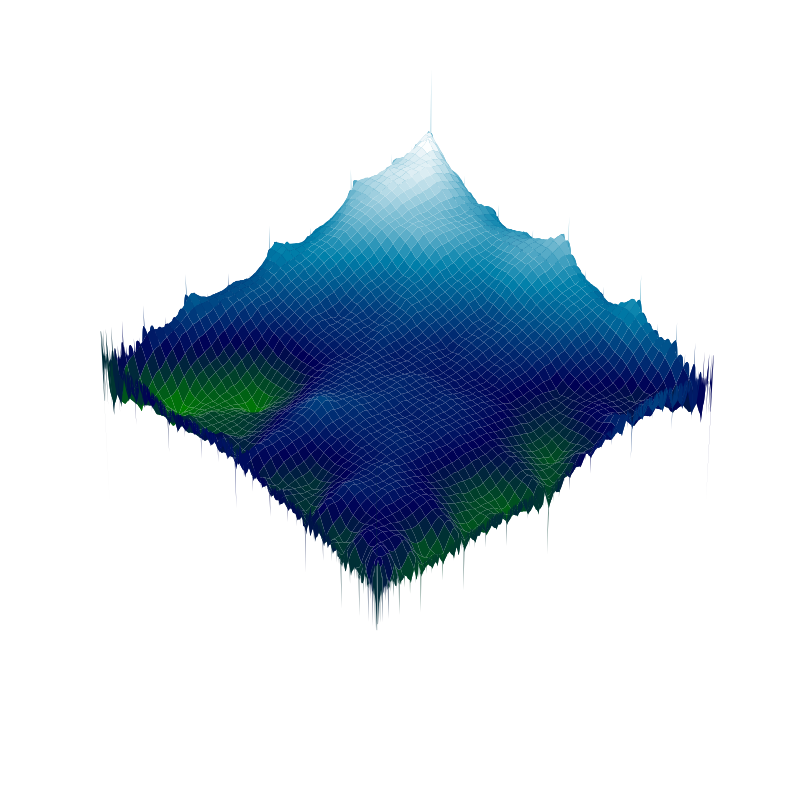

In [196]:
size = 1025
ocean = diamond_square(1025, 0.11)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(size)
y = np.arange(size)
x, y = np.meshgrid(x, y)
ax.plot_surface(x, y, ocean, cmap='ocean')
ax.axis('off')
ax.view_init(elev=37, azim=50) 
plt.show()

Слід вказати, що "Diamond-Square" дозволяє створювати й двовимірні зображення. Фрактал нище відомий як "фрактал хмари" чи "фрактал плазми". При зміні грубості можна побачити лише зміну в кольорах через те, що вона відповідає саме за висоту кожної точки, яка у такому випадку відображена кольором.

In [48]:
def plot_fractal(power, scale):
    size = 2 ** power + 1
    clouds = diamond_square(size, scale*10)
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))

    ax[0].imshow(clouds, cmap='gray')
    ax[0].axis('off')

    ax[1].imshow(clouds, cmap='tab20c')
    ax[1].grid(True, color='black', linewidth=0.6, zorder=100)
    
    plt.show()
    
widgets.interactive(
    plot_fractal, 
    scale=IntSlider(min=0, max=1000, step=1, value=50, description='Грубість', readout=False), 
    power=IntSlider(value=8, min=1, max=10, step=1, description='Ітерації')
)

interactive(children=(IntSlider(value=8, description='Ітерації', max=10, min=1), IntSlider(value=50, descripti…

## Джерела

### Книги
- Fractal Geometry: Mathematical Foundations and Applications
- Fractals 1988
- Measure, Topology, and Fractal Geometry
- The Fractal Geometry of Nature. Benoit B Mandelbrot

### Статті
- [Animate Your Own Fractals in Python with Matplotlib](https://matplotlib.org/matplotblog/posts/animated-fractals/)
- [Generating a recursive Romanesco broccoli](https://craftofcoding.wordpress.com/2018/09/28/generating-a-recursive-romanesco-broccoli/)
- [Plotting](https://www.algorithm-archive.org/contents/plotting/plotting.html)
- [The Barnsley Fern](https://www.algorithm-archive.org/contents/barnsley/barnsley.html)
- [Dragon curve](https://en.wikipedia.org/wiki/Dragon_curve#See_also)

### Відео та плейлісти
- [Essence of linear algebra](https://youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&si=vpa2oj4ueJG3o9Qb)
- [Fractals are typically not self-similar](https://youtu.be/gB9n2gHsHN4?si=hXFoPSPh2P6AwcR_)
- [Barnsley ferns, but actually explaining each function](https://youtu.be/xoXe0AljUMA?si=AsWlmDbQGEyX0Izp)
- [The Mandelbrot Set Explained](https://youtu.be/7MotVcGvFMg?si=C-93r_CRHQqWazzj)
- [Julia Sets, and how they relate to The Mandelbrot Set](https://youtu.be/dctJ7ISkU-4?si=P3GHFxFaudnj2itT)

<p style="text-align: right; font-size: calc(1em - 5px);">Пришедько Уляна Богданівна</p>

In [84]:
from IPython.display import display, HTML, Javascript

css = """
<style>
:root {
    --jp-content-font-size1: 19px;  
    --jp-widgets-slider-track-thickness: 5px;
    --jp-widgets-slider-handle-size: 14px;
    --jp-widgets-font-size: 8;
    --jp-widgets-inline-height: 15px;
    --jp-widgets-inline-margin: 3px;
}
.widget-inline-hbox .widget-label, .jupyter-widget-inline-hbox .jupyter-widget-label {
    font-size: 17px;
    color: var('--jp-content-font-color');
}
body, div#main, div#rendered_cells { background: #e8e6e6; } 
@media (min-width: 600px) {
    :root {
        --jp-content-font-size1: 22px;
        --jp-widgets-slider-track-thickness: 7px;
        --jp-widgets-slider-handle-size: 18px;
        --jp-widgets-font-size: 9;
        --jp-widgets-inline-height: 18px;
        --jp-widgets-inline-margin: 4px;
    }
}

@media (min-width: 1024px) { 
    :root {
        --jp-content-font-size1: 24px; 
        --jp-widgets-slider-track-thickness: 9px;
        --jp-widgets-slider-handle-size: 21px;
        --jp-widgets-font-size: 10;
        --jp-widgets-inline-height: 20px;
        --jp-widgets-inline-margin: 5px;
    }
}
div#rendered_cells>div {
    width: calc(100vw - 40px)!important;
    margin: auto;
    max-width: 1000px;
    background: white;
    padding: 10px;
    border-radius: 8px;
    box-shadow: 0px 4px 16px rgba(0, 0, 0, 0.3);
}
::selection {
    background: rgb(117 237 153 / 44%);
}
.jp-RenderedHTMLCommon img, .jp-RenderedImage img, .jp-RenderedHTMLCommon svg, .jp-RenderedSVG svg {
    width: 70%;
    height: auto;
    display: block;
    margin-left: auto;
    margin-right: auto;
}
</style>
"""

is_voila = 'voila' in get_ipython().config.IPKernelApp.connection_file
if is_voila:
    display(HTML(css))